 # EDA -1 BIKE DETAILS DATASET 

1. Selling Price Range: (5000, 760000)
2. Median Selling Price: 45000.0
3. Most Common Seller Type: Individual
4. Bikes Driven More than 50,000 km: 170
5. Average KM Driven by Ownership Type:
 owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64
6. Proportion of Bikes from 2015 or Older: 0.5664467483506126
7. Missing Values:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64
8. Bike with Highest Ex-Showroom Price:
 name                 Harley-Davidson Street Bob
ex_showroom_price                     1278000.0
Name: 134, dtype: object
9. Total Bikes by Seller Type:
 seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


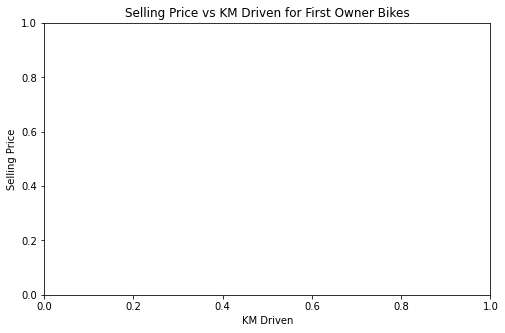

11. Outliers removed in km_driven column using IQR method


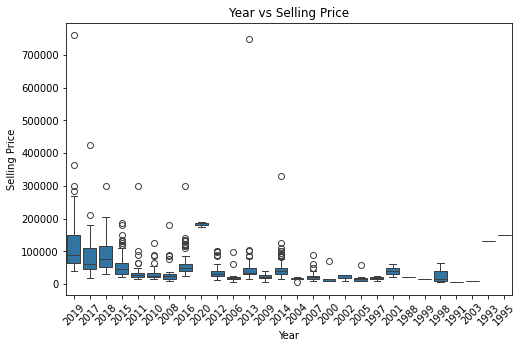

13. Depreciation in Selling Price by Age:
 age
5     183333.333333
6     119689.511628
7      87660.374046
8      78894.736842
9      58469.018692
10     56500.000000
11     48668.131868
12     51136.986301
13     35748.400000
14     35655.721311
15     31793.333333
16     22267.857143
17     34289.285714
18     24927.586207
19     23380.000000
20     16978.571429
21     15100.000000
22      8000.000000
23     20666.666667
24     40000.000000
25     20833.333333
26     15000.000000
27     28333.333333
28     17500.000000
30    150000.000000
32    130000.000000
34      6000.000000
37     20000.000000
Name: selling_price, dtype: float64
14. Bikes Priced Above Average for Their Manufacturing Year:
                                       name  year  selling_price
0                Royal Enfield Classic 350  2019         175000
2      Royal Enfield Classic Gunmetal Grey  2018         150000
3        Yamaha Fazer FI V 2.0 [2016-2018]  2015          65000
7     Royal Enfield Bullet 350 [2007-20

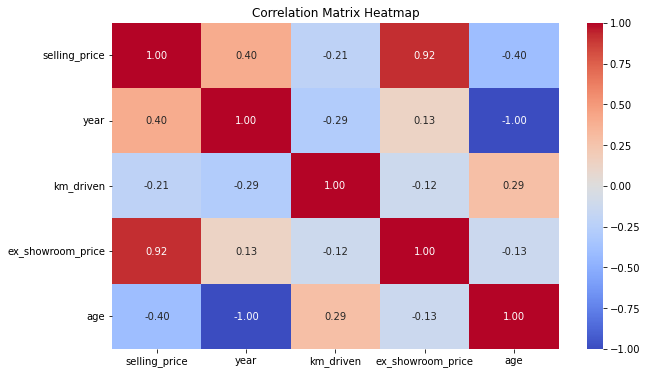

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('BIKE DETAILS.csv')

# Convert necessary columns to numeric, handling errors
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')
df['km_driven'] = pd.to_numeric(df['km_driven'], errors='coerce')
df['ex_showroom_price'] = pd.to_numeric(df['ex_showroom_price'], errors='coerce')
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Drop rows with missing values in critical columns
df.dropna(subset=['selling_price', 'km_driven', 'year'], inplace=True)

# 1. Range of selling prices
selling_price_range = df['selling_price'].min(), df['selling_price'].max()
print("1. Selling Price Range:", selling_price_range)

# 2. Median selling price
median_selling_price = df['selling_price'].median()
print("2. Median Selling Price:", median_selling_price)

# 3. Most common seller type
most_common_seller_type = df['seller_type'].mode()[0]
print("3. Most Common Seller Type:", most_common_seller_type)

# 4. Bikes driven more than 50,000 km
high_km_bikes = df[df['km_driven'] > 50000].shape[0]
print("4. Bikes Driven More than 50,000 km:", high_km_bikes)

# 5. Average km_driven by ownership type
avg_km_by_ownership = df.groupby('owner')['km_driven'].mean()
print("5. Average KM Driven by Ownership Type:\n", avg_km_by_ownership)

# 6. Proportion of bikes from 2015 or older
proportion_old_bikes = (df[df['year'] <= 2015].shape[0]) / df.shape[0]
print("6. Proportion of Bikes from 2015 or Older:", proportion_old_bikes)

# 7. Missing value trend
missing_values = df.isnull().sum()
print("7. Missing Values:\n", missing_values)

# 8. Highest ex-showroom price
max_ex_price_row = df.loc[df['ex_showroom_price'].idxmax(), ['name', 'ex_showroom_price']]
print("8. Bike with Highest Ex-Showroom Price:\n", max_ex_price_row)

# 9. Total number of bikes by seller type
bikes_by_seller_type = df['seller_type'].value_counts()
print("9. Total Bikes by Seller Type:\n", bikes_by_seller_type)

# 10. Relationship between selling_price and km_driven for first-owner bikes
first_owner_bikes = df[df['owner'] == 'First Owner']
plt.figure(figsize=(8, 5))
sns.scatterplot(x=first_owner_bikes['km_driven'], y=first_owner_bikes['selling_price'])
plt.title('Selling Price vs KM Driven for First Owner Bikes')
plt.xlabel('KM Driven')
plt.ylabel('Selling Price')
plt.show()

# 11. Removing outliers in km_driven using IQR method
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_clean = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
print("11. Outliers removed in km_driven column using IQR method")

# 12. Bivariate analysis between year and selling_price
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['year'].astype(str), y=df['selling_price'])
plt.xticks(rotation=45)
plt.title('Year vs Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

# 13. Average depreciation in selling price
df['age'] = 2025 - df['year']  # Assuming current year as 2025
depreciation = df.groupby('age')['selling_price'].mean()
print("13. Depreciation in Selling Price by Age:\n", depreciation)

# 14. Bikes priced significantly above the average for their manufacturing year
avg_price_by_year = df.groupby('year')['selling_price'].mean()
df['above_avg'] = df.apply(lambda row: row['selling_price'] > avg_price_by_year[row['year']], axis=1)
above_avg_bikes = df[df['above_avg']][['name', 'year', 'selling_price']]
print("14. Bikes Priced Above Average for Their Manufacturing Year:\n", above_avg_bikes)

# 15. Correlation matrix and heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


# EDA - 2 CAR SALES DATASET

Average selling price of cars for each dealer:
                                         Dealer_Name     Price ($)
0               Buddy Storbeck's Diesel Service Inc  27217.261563
1                                  C & M Motors Inc  28111.755200
2                                       Capitol KIA  28189.703822
3                                 Chrysler Plymouth  27555.526400
4                            Chrysler of Tri-Cities  28123.091054
5                                     Classic Chevy  28602.014446
6                           Clay Johnson Auto Sales  27816.027113
7                                Diehl Motor CO Inc  27993.929487
8                             Enterprise Rent A Car  28312.580800
9                        Gartner Buick Hyundai Saab  28247.621019
10                              Hatfield Volkswagen  27853.712242
11                                  Iceberg Rentals  28522.958533
12                     McKinney Dodge Chrysler Jeep  27684.096979
13                      Moto

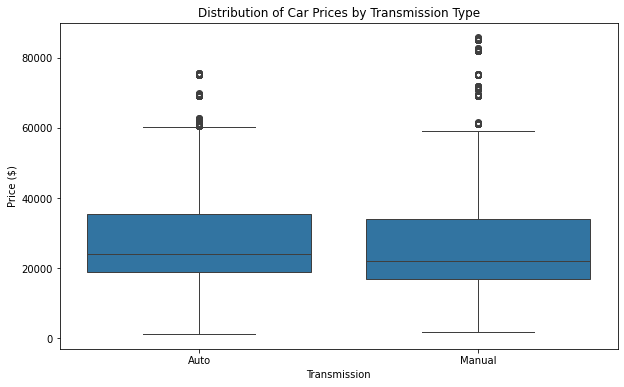

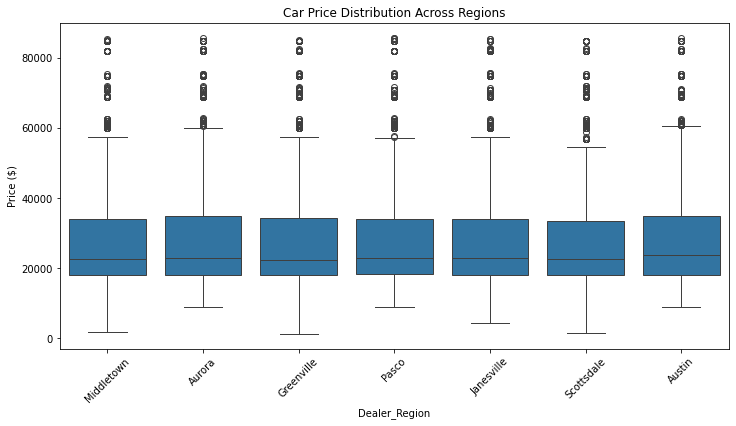

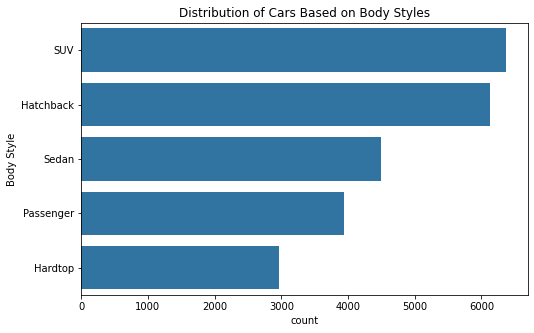

Average selling price by gender and income:
       Gender  Annual Income     Price ($)
0     Female          13500  28132.038732
1     Female         106000  46001.000000
2     Female         121000  20000.000000
3     Female         190000  19001.000000
4     Female         211000  51000.000000
...      ...            ...           ...
3437    Male        6600000  39000.000000
3438    Male        6800000  15000.000000
3439    Male        7650000  21000.000000
3440    Male        8000000  85000.000000
3441    Male       11200000  26001.000000

[3442 rows x 3 columns]
Car price distribution and number of cars sold by region:
   Dealer_Region     Price ($)  Car_id
0        Aurora  28334.626837    3130
1        Austin  28341.603628    4135
2    Greenville  28180.819054    3128
3    Janesville  27833.350955    3821
4    Middletown  27856.338875    3128
5         Pasco  28119.039923    3131
6    Scottsdale  27954.958928    3433
Average car price by engine size:
                       Engine

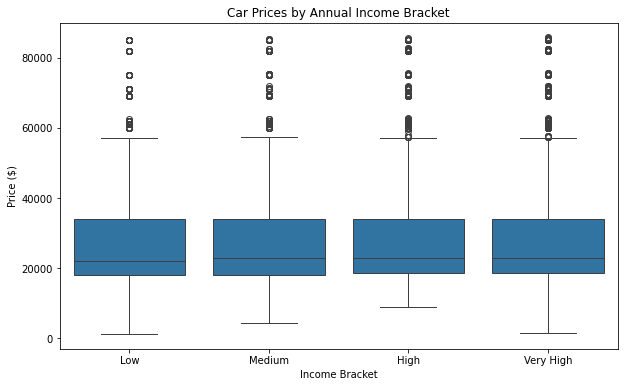

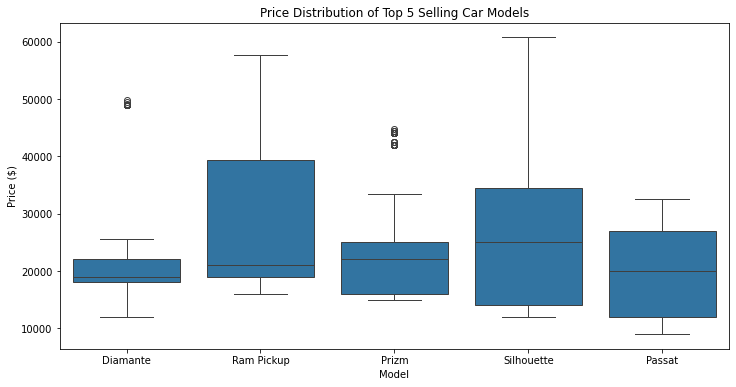

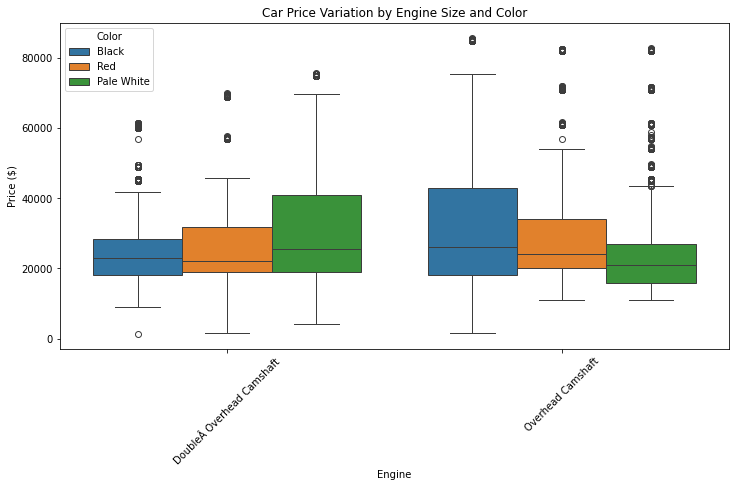

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

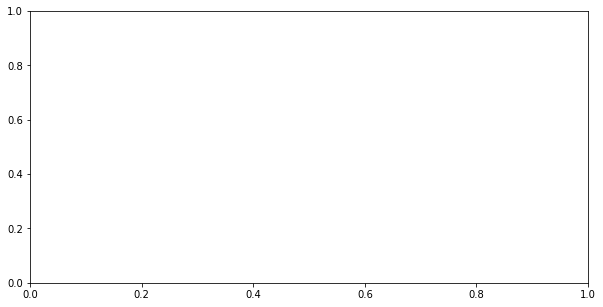

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Car Sale.csv"
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.strip()

# Ensure 'Annual Income' is numeric
df['Annual Income'] = pd.to_numeric(df['Annual Income'], errors='coerce')

# 1. Average selling price of cars for each dealer
avg_price_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().reset_index()
print("Average selling price of cars for each dealer:\n", avg_price_dealer)

# 2. Car brand with highest variation in prices
price_variation = df.groupby('Company')['Price ($)'].std().reset_index()
highest_variation_brand = price_variation.sort_values(by='Price ($)', ascending=False).iloc[0].to_numpy()
print("Car brand with highest price variation:", highest_variation_brand)

# 3. Distribution of car prices for each transmission type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=df)
plt.title('Distribution of Car Prices by Transmission Type')
plt.show()

# 4. Distribution of car prices across different regions
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.xticks(rotation=45)
plt.title('Car Price Distribution Across Regions')
plt.show()

# 5. Distribution of cars based on body styles
plt.figure(figsize=(8, 5))
sns.countplot(y='Body Style', data=df, order=df['Body Style'].value_counts().index)
plt.title('Distribution of Cars Based on Body Styles')
plt.show()

# 6. Average selling price of cars by customer gender and annual income
avg_price_gender_income = df.groupby(['Gender', 'Annual Income'])['Price ($)'].mean().reset_index()
print("Average selling price by gender and income:\n", avg_price_gender_income)

# 7. Distribution of car prices and number of cars sold by region
region_sales = df.groupby('Dealer_Region').agg({'Price ($)': 'mean', 'Car_id': 'count'}).reset_index()
print("Car price distribution and number of cars sold by region:\n", region_sales)

# 8. Average car price by engine size
avg_price_engine = df.groupby('Engine')['Price ($)'].mean().reset_index()
print("Average car price by engine size:\n", avg_price_engine)

# 9. Car prices by customer’s annual income bracket
df = df.dropna(subset=['Annual Income'])  # Drop rows where Annual Income is NaN
income_brackets = pd.qcut(df['Annual Income'].values.flatten(), q=4, labels=['Low', 'Medium', 'High', 'Very High'])

df['Income Bracket'] = income_brackets
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income Bracket', y='Price ($)', data=df)
plt.title('Car Prices by Annual Income Bracket')
plt.show()

# 10. Top 5 car models with highest sales and their price distribution
top_models = df['Model'].value_counts().nlargest(5).index
top_models_data = df[df['Model'].isin(top_models)]
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Price ($)', data=top_models_data)
plt.title('Price Distribution of Top 5 Selling Car Models')
plt.show()

# 11. Car price variation by engine size and color
plt.figure(figsize=(12, 6))
sns.boxplot(x='Engine', y='Price ($)', hue='Color', data=df)
plt.xticks(rotation=45)
plt.title('Car Price Variation by Engine Size and Color')
plt.show()

# 12. Seasonal trend in car sales
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])  # Drop rows where Date conversion failed
df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby('Month')['Car_id'].count().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x='Month', y='Car_id', data=monthly_sales, marker='o')
plt.xticks(range(1, 13))
plt.title('Seasonal Trend in Car Sales')
plt.show()

# 13. Car price distribution by body style and transmission type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df)
plt.xticks(rotation=45)
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.show()

# 14. Correlation between car price, engine size, and annual income
df_numeric = df[['Price ($)', 'Annual Income']].copy()
df_numeric['Engine_Size'] = df['Engine'].astype('category').cat.codes
correlation_matrix = df_numeric.corr()
print("Correlation matrix:\n", correlation_matrix)
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Car Price, Engine Size, and Annual Income')
plt.show()

# 15. Average car price by model and engine type
avg_price_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()
print("Average car price by model and engine type:\n", avg_price_model_engine)


# EDA -3 AMAZON SALES DATA

In [17]:
import pandas as pd
from collections import Counter
import re

# Load the dataset
file_path = "amazon.csv"
df = pd.read_csv(file_path)

# Data Cleaning: Convert necessary columns to numeric values
df['discounted_price'] = df['discounted_price'].replace({'₹': '', ',': ''}, regex=True).astype(float)
df['actual_price'] = df['actual_price'].replace({'₹': '', ',': ''}, regex=True).astype(float)
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = df['rating_count'].replace({',': ''}, regex=True).astype(float)

# Q1: What is the average rating for each product category?
print("\nQ1: Average Rating per Product Category")
print(df.groupby('category')['rating'].mean().round(2).to_string())

# Q2: What are the top rating_count products by category?
print("\nQ2: Top Rating Count Products by Category")
top_rated_products = df.loc[df.groupby('category')['rating_count'].idxmax(), ['category', 'product_name', 'rating_count']]
print(top_rated_products.to_string(index=False))

# Q3: What is the distribution of discounted prices vs. actual prices?
print("\nQ3: Distribution of Discounted Prices vs. Actual Prices")
print(df[['discounted_price', 'actual_price']].describe().to_string())

# Q4: How does the average discount percentage vary across categories?
print("\nQ4: Average Discount Percentage by Category")
print(df.groupby('category')['discount_percentage'].mean().round(2).to_string())

# Q5: What are the most popular product names?
print("\nQ5: Most Popular Product Names")
print(df.nlargest(5, 'rating_count')[['product_name', 'rating_count']].to_string(index=False))

# Q6: What are the most popular product keywords?
words = ' '.join(df['product_name']).lower()
word_counts = Counter(re.findall(r'\b[a-zA-Z]+\b', words))
print("\nQ6: Most Popular Product Keywords")
for word, count in word_counts.most_common(10):
    print(f"{word}: {count}")

# Q7: What are the most popular product reviews?
print("\nQ7: Most Popular Product Reviews")
print(df.nlargest(5, 'rating_count')[['review_content', 'rating_count']].to_string(index=False))

# Q8: What is the correlation between discounted_price and rating?
print("\nQ8: Correlation between Discounted Price and Rating")
print(df[['discounted_price', 'rating']].corr().iloc[0, 1].round(3))

# Q9: What are the Top 5 categories based on the highest ratings?
print("\nQ9: Top 5 Categories by Highest Ratings")
print(df.groupby('category')['rating'].mean().nlargest(5).round(2).to_string())

# Q10: Identify any potential areas for improvement or optimization based on the data analysis.
print("\nQ10: Potential Areas for Improvement")
print("\nMissing Values:")
print(df.isnull().sum().to_string())
print("\nOutlier Check:")
print(df.describe().to_string())



Q1: Average Rating per Product Category
category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                     3.80
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                    4.15
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                            3.50
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                         3.60
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                            4.05
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|Webcams&VoIPEquipment|Webcams                         4.20
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors                                 4.03
Computers&Accessories|Accessories&Peripherals|Cables&A

# EDA -4: SPOTIFY DATASET

Null values in dataset:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Duplicate rows found: 27


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

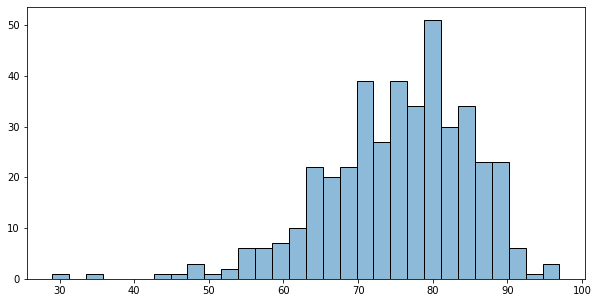

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('spotify.csv')

# 1. Check for null values and handle them
print("Null values in dataset:")
print(df.isnull().sum())
df.dropna(inplace=True)  # Drop missing values

# 2. Check for duplicate rows and remove them
duplicates = df.duplicated().sum()
print(f"Duplicate rows found: {duplicates}")
df.drop_duplicates(inplace=True)

# 3. Distribution of popularity
plt.figure(figsize=(10, 5))
sns.histplot(df['Popularity'], bins=30, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

# 4. Relationship between popularity and duration
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['duration_ms'], y=df['Popularity'])
plt.title('Popularity vs Duration of Tracks')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()

# 5. Artist with the highest number of tracks
plt.figure(figsize=(12, 5))
artist_counts = df['artist_name'].value_counts().head(10)
sns.countplot(y=df['artist_name'], order=artist_counts.index)
plt.title('Top 10 Artists with Most Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()

# 6. Top 5 least popular tracks
least_popular_tracks = df.nsmallest(5, 'Popularity')[['artist_name', 'track_name']]
print("Top 5 Least Popular Tracks:")
print(least_popular_tracks)

# 7. Top 5 most popular artists by average popularity
popular_artists = df.groupby('artist_name')['Popularity'].mean().nlargest(5)
print("Top 5 Most Popular Artists by Average Popularity:")
print(popular_artists)

# 8. Most popular tracks for top 5 most popular artists
for artist in popular_artists.index:
    top_track = df[df['artist_name'] == artist].nlargest(1, 'Popularity')[['track_name']]
    print(f"Most Popular Track by {artist}: {top_track.iloc[0, 0]}")

# 9. Pair plot for numerical variables
sns.pairplot(df[['Popularity', 'duration_ms']])
plt.show()

# 10. Box plot of track duration across different artists
plt.figure(figsize=(15, 6))
top_artists = df['artist_name'].value_counts().index[:10]
sns.boxplot(x='artist_name', y='duration_ms', data=df[df['artist_name'].isin(top_artists)])
plt.xticks(rotation=90)
plt.title('Track Duration Distribution Across Artists')
plt.show()

# 11. Swarm/violin plot for track popularity across different artists
plt.figure(figsize=(15, 6))
sns.violinplot(x='artist_name', y='Popularity', data=df[df['artist_name'].isin(top_artists)])
plt.xticks(rotation=90)
plt.title('Popularity Distribution Across Artists')
plt.show()
